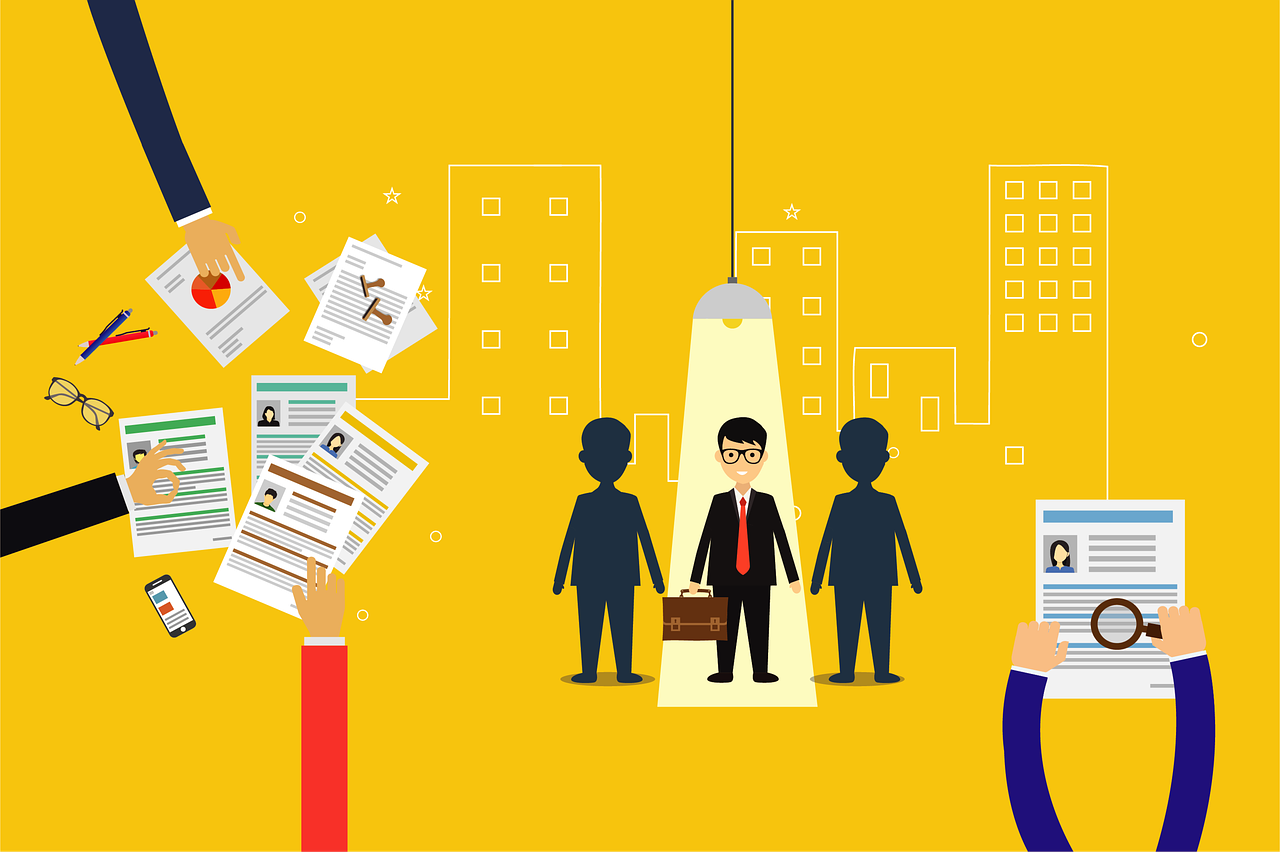

# Questions And Answer

## 1. Which factor influenced a candidate in getting placed?

# Ans: Status is highly related with salary, then ssc percentage(ssc_p)

## 2. Does percentage matters for one to get placed?

# Ans: Yes, percentage matters for one get placed

## 3. Which degree specialization is much demanded by corporate?

# Ans: Marketing and Finance is much demanded by corporate

## 4. Play with the data conducting all statistical tests.

# If you like, please upvote

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Load some extra packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rcParams
import plotly.graph_objects as go
pd.set_option('display.max_columns', 80) 
import random

In [ ]:
# Load the dataset
data = pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

In [ ]:
# First 5 row
data.head()

In [ ]:
# Shape of data
data.shape

In [ ]:
# Info of data
data.info()

In [ ]:
# Unique value for some columns
a = ["ssc_b", "hsc_b" ,"hsc_s","degree_t", "workex", "specialisation", "status"]
i = 0
for i in range(len(a)):
    b = data[a[i]].unique()
    c = a[i]
    i += 1
    print(f"column name: {c} \nUnique value: {b}")

In [ ]:
# Fill the salary column - because in salary column where status is Not Placed the salary column value is np.nan, So replace it by 0
data["salary"] = data["salary"].fillna(0)

In [ ]:
# Create random palettes - try to make some fun

cmap_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
             'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
             'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
             'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
             'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
             'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
             'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 
             'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
             'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 
             'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
             'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
             'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
             'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
             'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
             'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
             'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
             'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 
             'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 
             'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
             'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis',
             'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

i = 0
for i in range(len(cmap_list)):
    n = random.randint(0, i)
    a = cmap_list[n]
sns.set_palette(a)

In [ ]:
# Count of gender from data

genders = data["gender"].value_counts()
sns.set_style("whitegrid")
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(18, 6))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))

    return "{:.1f}%\n({:d})".format(pct, absolute)
wedges, texts, autotexts = ax.pie(genders, autopct=lambda pct: func(pct, genders),
                                  textprops=dict(color="w"), colors=["#ff6f69", "#ffcc5c"])
sns.countplot(data["gender"])
ax.legend(genders.index,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.suptitle("Count of gender")

In [ ]:
plt.subplots(figsize=(10, 6))
sns.countplot(data["ssc_b"], hue=data["status"])
plt.title("SSC Board Vs Status")

In [ ]:
plt.subplots(figsize=(10, 6))
sns.countplot(data["hsc_b"], hue=data["status"])
plt.title("HSC Board Vs Status")

In [ ]:
plt.subplots(figsize=(10, 6))
sns.countplot(data["hsc_s"])

In [ ]:
a = data[data["ssc_b"]=="Others"].groupby(["ssc_b", "ssc_p"]).mean().reset_index()
b = data[data["ssc_b"]=="Central"].groupby(["ssc_b", "ssc_p"]).mean().reset_index()

fig = px.line(a, x=a.index, y='ssc_p', title="Central and Others Board SSC Percentage")

# Only thing I figured is - I could do this 
fig.add_scatter(x=b.index, y=b['ssc_p'], name="Central", showlegend=False) # Not what is desired - need a line 

# Show plot 
fig.show()

In [ ]:
a = data[data["hsc_b"]=="Others"].groupby(["hsc_b", "hsc_p"]).mean().reset_index()
b = data[data["hsc_b"]=="Central"].groupby(["hsc_b", "hsc_p"]).mean().reset_index()

fig = px.line(a, x=a.index, y='hsc_p', title="Central and Others Board HSC Percentage")

# Only thing I figured is - I could do this 
fig.add_scatter(x=b.index, y=b['hsc_p'], name="Central", showlegend=False) # Not what is desired - need a line 

# Show plot 
fig.show()

In [ ]:
a = data[data["degree_t"]=="Sci&Tech"].groupby("degree_p").mean().reset_index()
b = data[data["degree_t"]=="Comm&Mgmt"].groupby("degree_p").mean().reset_index()
c = data[data["degree_t"]=="Others"].groupby("degree_p").mean().reset_index()
sns.set_style("whitegrid")

plt.subplots(figsize=(16,7))
a["degree_p"].plot(label="Sci&Tech", linewidth=3)
b["degree_p"].plot(label="Comm&Mgmt", linewidth=3)
c["degree_p"].plot(label="Others", linewidth=3)
plt.legend()
plt.title("Under Graduation(Degree type) Vs Under Graduation(Degree percentage)")

In [ ]:
plt.subplots(figsize=(10, 6))
sns.countplot(data["degree_t"], hue=data["status"])
plt.title("Under Graduation(Degree type) Vs Status")

In [ ]:
plt.subplots(figsize=(10, 6))
sns.countplot(data["degree_t"], hue=data["workex"])
plt.title("Under Graduation(Degree type) Vs Work Experience")

In [ ]:
plt.subplots(figsize=(10, 6))
sns.countplot(data["degree_t"], hue=data["status"])
plt.title("Under Graduation(Degree type) Vs Status")

In [ ]:
plt.subplots(figsize=(10, 6))
sns.countplot(data["specialisation"], hue=data["status"])
plt.title("Specialisation Vs Status")

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
list_col = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status"]
i = 0
for i in range(len(list_col)):
    data[list_col[i]] = label_encoder.fit_transform(data[list_col[i]])
    i+=1

In [ ]:
data.head()

In [ ]:
# drop sl_no
data.drop('sl_no', axis=1, inplace=True)

In [ ]:
# Correlation and visualization in heatmap

cmap_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
             'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
             'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
             'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
             'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
             'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
             'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 
             'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
             'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 
             'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
             'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
             'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
             'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
             'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
             'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
             'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
             'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 
             'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 
             'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
             'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis',
             'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

i=0
for i in range(len(cmap_list)):
    n = random.randint(0, i)
    cmap = cmap_list[n]
    i+=1
plt.subplots(figsize=(16,7))
corre = data.corr()
sns.heatmap(corre, annot=True, linewidths=.5, cmap=cmap)

In [ ]:
# Relation between status and other columns
corre["status"].sort_values(ascending=False)

In [ ]:
# Copy data, so that, it can't hamper real data
data1 = data.copy()
# data1 = data.drop("salary", axis=1)

**data is too little. It is clear that salary column is fully depended on status column. If placed then have salary, either notplaced have salary 0. So, if we take salary column it will fool us giving 100% accuracy.**

**You Can Try**

In [ ]:
# Split the data

from sklearn.model_selection import train_test_split
X = data1.drop(["status", "salary"], axis=1)
y = data1["status"]

seed = 42
test = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test)

In [ ]:
# Scale down features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Load necessary package
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# different types of model and accuracy
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SVC",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(n_estimators=700),
    LogisticRegression(),
    BernoulliNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)
for name, model in models:
    model_name = model
    model_name.fit(X_train, y_train)
    predict = model_name.predict(X_test)
    accuracy1 = accuracy_score(predict, y_test)
    accuracy3 = classification_report(predict, y_test)
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring="accuracy")

    print(f"{name} model Accuracy Score {accuracy1}")
    
    print("******************************")
        
    print(f"classification report {accuracy3}")
    
    print("******************************")
    
    print(f"{name} and prediction {predict}")
    
    print("******************************")
    
    print(f"cross val score {scores}")
    
    print("*******************************")

# From my curiosity ------ I do regression analysis

In [ ]:
X = data.drop("salary", axis=1)
y = data["salary"].copy()

In [ ]:
seed = 42
test = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
def regression(pipeline, X_train, y_train, X_test, y_test):
    model_fit = pipeline.fit(X_train, y_train)
    model_pred = model_fit.predict(X_test)
    mse = mean_squared_error(y_test, model_pred)
    print("-" * 50)
    rmse = np.sqrt(mse)
    print("accuracy score: {}%".format(rmse))
    return rmse, model_pred

    
names = ["LinearRegression", "RandomForest", "DecisionTree"]
regressor = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor()
]

zipped_reg = zip(names, regressor)

def compare_clf(regressor=zipped_reg):
    result = []
    for n, r in zipped_reg:
        checker_pipeline = Pipeline([
            ("regressor", r)
        ])
        reg = regression(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n, reg))
        
    return result

In [ ]:
results = compare_clf()
results

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Linear': results[0][1][1], 'Random': results[1][1][1], 'Decision': results[2][1][1]})
df.reset_index()

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

In [ ]:
a = list(results[0][1][1])
b = list(results[1][1][1])
c = list(results[2][1][1])
d = list(y_test)

In [ ]:
plt.subplots(figsize=(13, 6))
plt.plot(a,c='green', label= 'predictions Logistic')
plt.plot(d,c='black', label= 'actual')
plt.legend()
plt.show()

plt.subplots(figsize=(13, 6))
plt.plot(b,c='red', label= 'predictions RandomForest')
plt.plot(d,c='black', label= 'actual')
plt.legend()
plt.show()

plt.subplots(figsize=(13, 6))
plt.plot(c,c='blue', label= 'predictions DecisionTree')
plt.plot(d,c='black', label= 'actual')
plt.legend()
plt.show()

# If you like, Please upvote